## Prediction using Unsupervised ML

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("Iris.csv")
df.drop("Id", axis=1, inplace=True)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


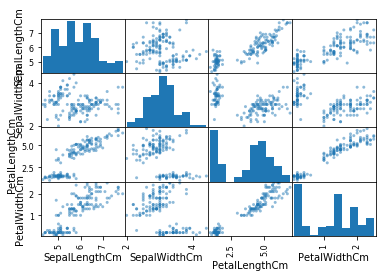

In [5]:
pd.plotting.scatter_matrix(df)
plt.show()

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
wcss = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=42).fit(X)
    wcss.append(model.inertia_)

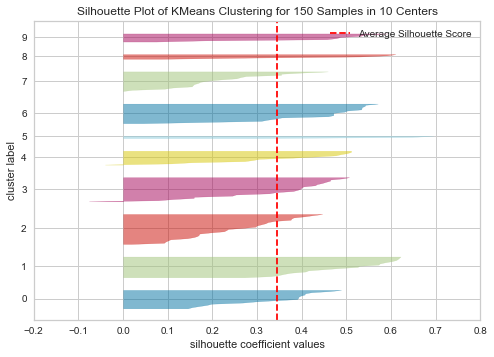

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC33296808>,
                     colors='yellowbrick', is_fitted='auto', model=None)

In [6]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(10, random_state=42, init='k-means++'), X, colors='yellowbrick')

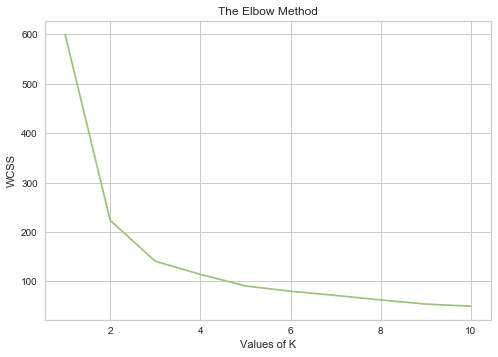

In [7]:
plt.plot(range(1, 11), wcss, 'gx-') 
plt.xlabel('Values of K') 
plt.ylabel('WCSS') 
plt.title('The Elbow Method') 
plt.show() 

In [8]:
# optimum no of clusters is 3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
pred = kmeans.fit_predict(X)

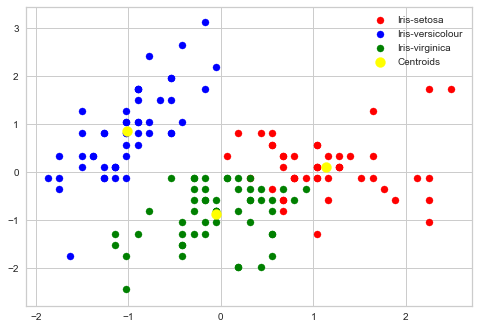

In [9]:
# visualizing clusters along two dimensions
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()